# Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_iris
from keras.utils import to_categorical
from sklearn.feature_selection import SelectKBest, mutual_info_classif, chi2
from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import GaussianRandomProjection, SparseRandomProjection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

sns.set()

2022-10-31 17:14:48.689803: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-31 17:14:48.689818: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
def cluestering(dataset, algorithm: str, n_clusters: int, out_file_name: str=None):
	if type(dataset) == str:
		df = pd.read_csv(dataset, ',', header=None)
	elif type(dataset) == pd.DataFrame:
		df = dataset
	else:
		try:
			df = pd.DataFrame(dataset)
		except ValueError:
			raise TypeError("dataset must be a pandas dataframe or a path to a csv file")
	if algorithm == "kmeans":
		algo = KMeans(
			n_clusters=n_clusters,
			n_init=30
		)
	elif algorithm == "EM":
		algo = GaussianMixture(
			n_components=n_clusters,
			n_init=30,
			init_params='kmeans'  # can also be kmeans or random !
		)
	else:
		raise ValueError("algorithm must be one of 'kmeans' or 'EM'")
	algo.fit(X=df)
	p = algo.predict(X=df)
	dfp = df.assign(label=p)
	if out_file_name is not None:
		dfp.to_csv(out_file_name, sep=',', encoding='utf-8', header=None)
	return dfp, algo

def load_iris_to_df():
	iris = load_iris()
	df = pd.DataFrame(iris['data'], columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
	df = df.assign(label=iris['target'])
	return df

def load_gender_to_df():
	df = pd.read_csv("../data/gender_x_all.csv", header=0)
	# normalize data set
	min_df, max_df = np.min(df, 0), np.max(df, 0)
	df[:] -= min_df
	df[:] /= max_df - min_df
	# add label
	df_lb = pd.read_csv("../data/gender_y_all.csv", header=0)
	df = df.assign(label=df_lb['label'])
	return df

def plot_2d(df: pd.DataFrame, x_axis: str, y_axis: str, label_axis: str='label', comment=""):
	fig, ax = plt.subplots()
	ax.scatter(df.get(x_axis), df.get(y_axis), c=df.get(label_axis), cmap='gist_ncar', linewidths=1, edgecolors='black')
	ax.set_xlabel(x_axis.replace('_', ' '), fontsize=15)
	ax.set_ylabel(y_axis.replace('_', ' '), fontsize=15)
	if comment != "":
		comment += "_"
	plt.savefig("../graphics/" + comment + x_axis + "_" + y_axis + "_" + label_axis + ".png")
	plt.show()

def plot_3d(df: pd.DataFrame, x_axis: str, y_axis: str, z_axis: str, label_axis: str='label', comment=""):
	fig = plt.figure()
	ax = fig.add_subplot(111, projection='3d')
	ax.scatter(df.get(x_axis), df.get(y_axis), df.get(z_axis), c=df.get(label_axis), s=5, depthshade=False, cmap='gist_ncar')
	ax.set_xlabel(x_axis.replace('_', ' '), fontsize=10)
	ax.set_ylabel(y_axis.replace('_', ' '), fontsize=10)
	ax.set_zlabel(z_axis.replace('_', ' '), fontsize=10)
	if comment != "":
		comment += "_"
	plt.savefig("../graphics/3D_" + comment + x_axis + "_" + y_axis + "_" + z_axis + "_" + label_axis + ".png")
	plt.show()

## Iris Dataset

### Truth

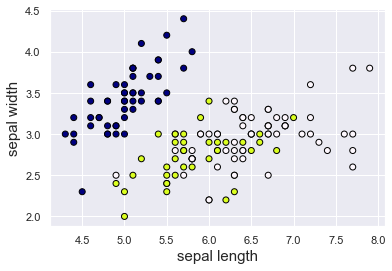

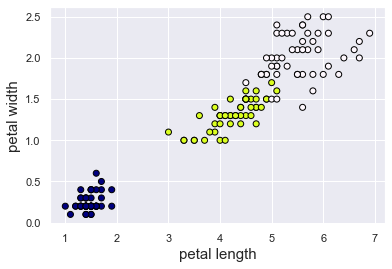

In [3]:
iris = load_iris_to_df()
plot_2d(iris, 'sepal_length', 'sepal_width', comment="org")
plot_2d(iris, 'petal_length', 'petal_width', comment="org")

### K-Means

/tmp/ipykernel_62160/3495158720.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  iris_data = iris.drop('label', 1)


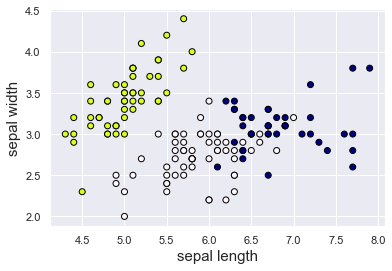

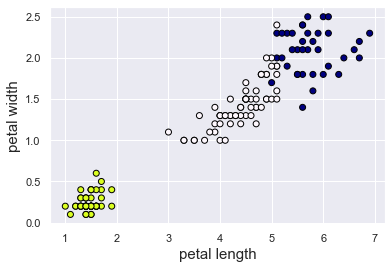

In [4]:
iris_data = iris.drop('label', 1)
iris_kmeans = cluestering(iris_data, 'kmeans', 3)[0]
plot_2d(iris_kmeans, 'sepal_length', 'sepal_width', comment="kmeans")
plot_2d(iris_kmeans, 'petal_length', 'petal_width', comment="kmeans")

### EM

/tmp/ipykernel_62160/2827243897.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  iris_data = iris.drop('label', 1)


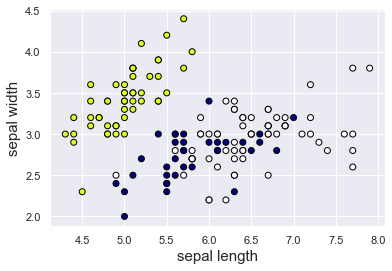

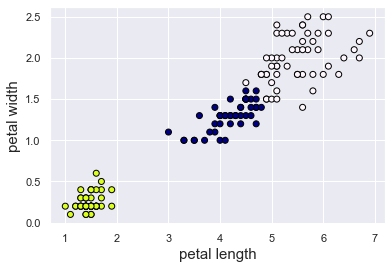

In [5]:
iris_data = iris.drop('label', 1)
iris_em = cluestering(iris_data, 'EM', 3)[0]
plot_2d(iris_em, 'sepal_length', 'sepal_width', comment="EM")
plot_2d(iris_em, 'petal_length', 'petal_width', comment="EM")

## Gender DataSet

### Truth

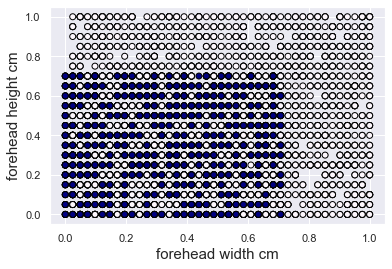

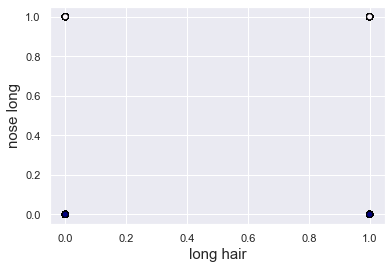

In [6]:
g = load_gender_to_df()
min_g, max_g = np.min(g, 0), np.max(g, 0)
g[:] -= min_g
g[:] /= max_g - min_g
plot_2d(g, 'forehead_width_cm', 'forehead_height_cm', comment="org")
plot_2d(g, 'long_hair', 'nose_long', comment="org")

### K-Means

/tmp/ipykernel_62160/4152895437.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  g_data = g.drop('label', 1)


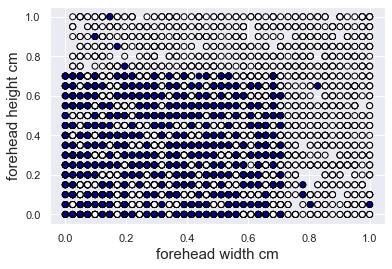

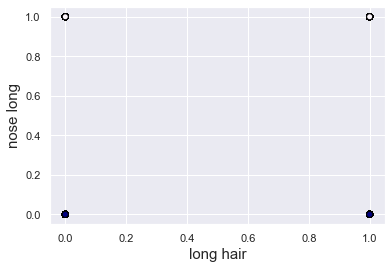

In [7]:
g_data = g.drop('label', 1)
g_kmeans = cluestering(g_data, 'kmeans', 2)[0]
plot_2d(g_kmeans, 'forehead_width_cm', 'forehead_height_cm', comment="kmeans")
plot_2d(g_kmeans, 'long_hair', 'nose_long', comment="kmeans")

### EM

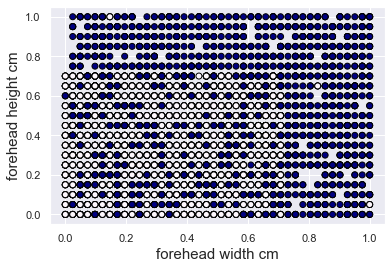

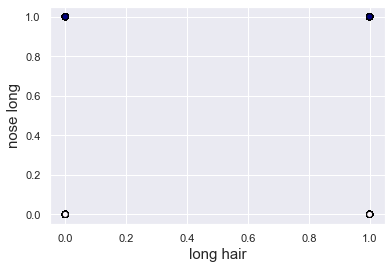

In [9]:
# g_data = g.drop('label', 1)
g_em = cluestering(g_data, 'EM', 2)[0]
plot_2d(g_em, 'forehead_width_cm', 'forehead_height_cm', comment="EM")
plot_2d(g_em, 'long_hair', 'nose_long', comment="EM")